## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df= pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#create the groupby to sort by drug regimen
drug_names_gb=combined_df.groupby("Drug Regimen")

#generating the summary statics table consiting of 
#consisting of the mean, median, variance, standard deviation,
#and SEM of the tumor volume for each drug regimen.
mean_drug_regimen=drug_names_gb["Tumor Volume (mm3)"].mean()
median_drug_regimen=drug_names_gb["Tumor Volume (mm3)"].median()
var_drug_regimen=drug_names_gb["Tumor Volume (mm3)"].var()
std_drug_regimen=drug_names_gb["Tumor Volume (mm3)"].std()
sem_drug_regimen=drug_names_gb["Tumor Volume (mm3)"].sem()

#creating the table
summary_statistics_table=pd.DataFrame({"Drug Regimen Names":drug_names_gb.count().index})
summary_statistics_table=summary_statistics_table.set_index(["Drug Regimen Names"])
summary_statistics_table["Mean"]=mean_drug_regimen
summary_statistics_table["Median"]=median_drug_regimen
summary_statistics_table["Variance"]=var_drug_regimen
summary_statistics_table["STD"]=std_drug_regimen
summary_statistics_table["SEM"]=sem_drug_regimen

#showing the table 
summary_statistics_table

,Mean,Median,Variance,STD,SEM
Drug Regimen Names,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

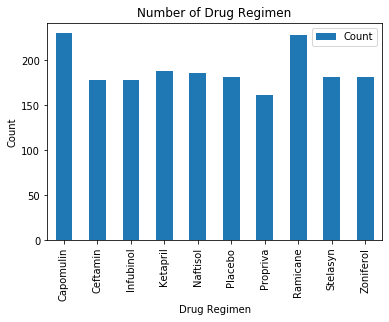

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df_2=pd.DataFrame({"Drug Regimen":drug_names_gb.count().index})
df_2=df_2.set_index(["Drug Regimen"])
df_2["Count"]=drug_names_gb["Drug Regimen"].count()

df_2.plot(kind="bar")

# Set a title for the chart
plt.title("Number of Drug Regimen")
plt.ylabel("Count")
plt.show()

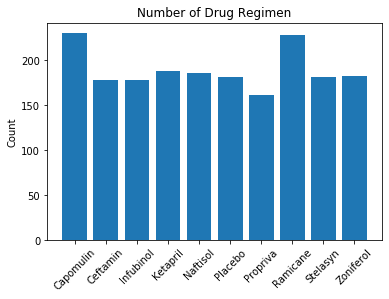

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(df_2))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,df_2["Count"])
plt.xticks(tick_locations,drug_names_gb.count().index,rotation=45)
plt.title("Number of Drug Regimen")
plt.ylabel("Count")
plt.show()


## Pie plots

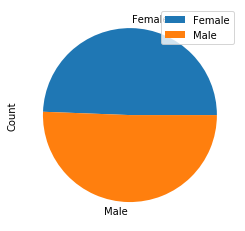

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=combined_df.groupby("Sex")
df_3=pd.DataFrame({"Gender":gender_group.count().index})
df_3.set_index(["Gender"],inplace=True)
df_3["Count"]=gender_group["Sex"].count()
df_3.plot(kind="pie",subplots=True,)
plt.show()


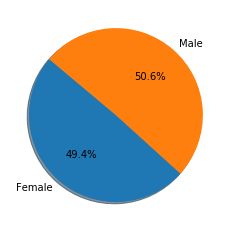

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=gender_group.count().index
sizes=df_3["Count"]
plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
df_4=combined_df.loc[((combined_df["Drug Regimen"]=="Capomulin")|(combined_df["Drug Regimen"]=="Ramicane")|(combined_df["Drug Regimen"]=="Infubinol")|(combined_df["Drug Regimen"]=="Ceftamin"))
                     ,["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Capomulin_data=df_4.loc[df_4["Drug Regimen"]=="Capomulin",["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Capomulin_data.reset_index(drop=True,inplace=True)

Infubinol_data=df_4.loc[df_4["Drug Regimen"]=="Infubinol",["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Infubinol_data.reset_index(drop=True,inplace=True)

Ceftamin_data=df_4.loc[df_4["Drug Regimen"]=="Ceftamin",["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Ceftamin_data.reset_index(drop=True,inplace=True)

Ramicane_data=df_4.loc[df_4["Drug Regimen"]=="Ramicane",["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
Ramicane_data.reset_index(drop=True,inplace=True)


Capomulin_groupby=Capomulin_data.groupby("Mouse ID")
Capomulin_data_final=Capomulin_groupby["Tumor Volume (mm3)"].min()


quartiles = Capomulin_data_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 31.80484133
The upper quartile of Capomulin is: 39.64829568
The interquartile range of Capomulin is: 7.843454349999998
The the median of Capomulin is: 37.68276664 
Values below 20.039659805 could be outliers.
Values above 51.41347720499999 could be outliers.


In [8]:
Infubinol_groupby=Infubinol_data.groupby("Mouse ID")
Infubinol_data_final=Infubinol_groupby["Tumor Volume (mm3)"].max()

quartiles = Infubinol_data_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [9]:

Ceftamin_groupby=Ceftamin_data.groupby("Mouse ID")
Ceftamin_data_final=Ceftamin_groupby["Tumor Volume (mm3)"].max()
quartiles = Ceftamin_data_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [10]:
Ramicane_groupby=Ramicane_data.groupby("Mouse ID")
Ramicane_data_final=Ramicane_groupby["Tumor Volume (mm3)"].min()
quartiles = Ramicane_data_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 31.09533505
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.56367122
The the median of temperatures is: 36.00302016 
Values below 16.749828219999998 could be outliers.
Values above 55.0045131 could be outliers.


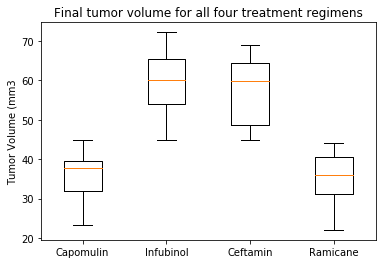

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interestRamicane_data
boxplot_data=[Capomulin_data_final,Infubinol_data_final,Ceftamin_data_final,Ramicane_data_final]
names=["Capomulin","Infubinol","Ceftamin","Ramicane"]
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.set_ylabel('')
ax1.boxplot(boxplot_data)
plt.xticks([1,2,3,4],names)
ax1.set_title('Final tumor volume for all four treatment regimens')
ax1.set_ylabel("Tumor Volume (mm3")
plt.show()


## Line and scatter plots

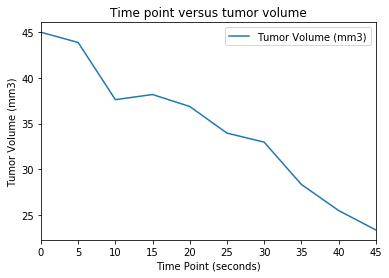

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_5=combined_df.loc[((combined_df["Drug Regimen"]=="Capomulin")|(combined_df["Drug Regimen"]=="Ramicane")|(combined_df["Drug Regimen"]=="Infubinol")|(combined_df["Drug Regimen"]=="Ceftamin"))
                     ,["Drug Regimen","Weight (g)","Timepoint","Tumor Volume (mm3)"]]
df_5.reset_index(drop=True,inplace=True)
Capomulin_data2=df_5.loc[df_5["Drug Regimen"]=="Capomulin",["Drug Regimen","Weight (g)","Timepoint","Tumor Volume (mm3)"]]
Capomulin_data2.reset_index(drop=True,inplace=True)
Capomulin_data2=Capomulin_data2.iloc[0:10]
Capomulin_data2.plot('Timepoint','Tumor Volume (mm3)',kind='line')
plt.title("Time point versus tumor volume")
plt.xlabel("Time Point (seconds)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

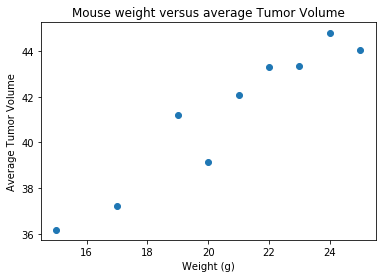

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_data3=df_5.loc[df_5["Drug Regimen"]=="Capomulin",["Drug Regimen","Weight (g)","Timepoint","Tumor Volume (mm3)"]]
Capomulin_data3.reset_index(drop=True,inplace=True)

gb2=Capomulin_data3.groupby("Weight (g)")
avg_tumor=gb2['Tumor Volume (mm3)'].mean()
weights=gb2["Weight (g)"].mean()
plt.scatter(weights,avg_tumor)
plt.title("Mouse weight versus average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume')
plt.show()

In [14]:
# Calculate the correlation coefficient 
correlation = st.pearsonr(weights,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


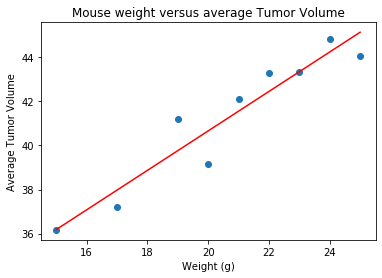

The linear Regression equation for the scatter plot is : y = 0.89x + 22.76


In [17]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#variables that will be graphed
x_values = weights
y_values = avg_tumor

#code for the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse weight versus average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume')
plt.show()
print("The linear Regression equation for the scatter plot is : " +str(line_eq))